# Echologger collection via API

In [ ]:
from echosndr import DualEchosounder
import time

## Connect and halt pinging
Assign the COM port.

In [ ]:
# Connect to the echosounder via serial
ss = DualEchosounder("\\\\.\\COM3", 115200) # Assign the COM if necessary
while ss.IsRunning(): # Check if it's running
    ss.Detect() # Stop pinging
time.sleep(.11)

## Set internal clock and setup collection parameters

In [ ]:
# Set the time from the computer
ss.SetCurrentTime()
time.sleep(.1)

# Pulse length - Low frequency
ss.SetValue("IdTxLengthL", "1000") 
time.sleep(.1)

 # Pulse length - High frequency
ss.SetValue("IdTxLengthH", "500")
time.sleep(.1)

# Range - Low frequency
ss.SetValue("IdRangeL", "100000")
time.sleep(.1)

# Range - High frequency
ss.SetValue("IdRangeH", "100000") 
time.sleep(.1)

# Output mode - 1: altimeter, 2: 10-bit text echo, 3: NMEA, 4: 12-bit text echo, 100: 12-bit binary echo, 101: 8-bit binary echo
ss.SetValue("IdOutput", "100")
time.sleep(.1)

# ADC Sampling frequency - 0 (Auto), 6250, 12500, 25000, 50000, 100000
ss.SetValue("IdSamplFreq", "12500")
time.sleep(.1)

# Ping Interval - 0.1-10 seconds
ss.SetValue("IdInterval", "1")
time.sleep(.1)

# Set dual frequency mode (alternating pings)
ss.SendCommand("IdSetDualFreq")

## Set Transmit and TVG details

In [ ]:
# Sound speed
ss.SetValue("IdSound", "1500") 
time.sleep(.1)

# Sound speed
ss.SetValue("IdTxPower", "1500") 
time.sleep(.1)

# TVG Mode - 1: gain + K*log(R) + TL*R, 2: gain + K*log(R), 3: gain, 4: gain + TL*R
ss.SetValue("IdTVGMode", "1") 
time.sleep(.1)

# TVG Spreading Coefficient (K) - Low frequency
ss.SetValue("IdTVGSprdL", "20") 
time.sleep(.1)

# TVG Spreading Coefficient (K) - High frequency
ss.SetValue("IdTVGSprdH", "20") 
time.sleep(.1)

# Absorption coefficient - Low frequency
ss.SetValue("IdTVGAbsL", "0.05") 
time.sleep(.1)

# Absorption coefficient - High frequency
ss.SetValue("IdTVGAbsH", "0.05") 
time.sleep(.1)

# Gain - Low frequency
ss.SetValue("IdGainL", "0") 
time.sleep(.1)

# Gain - High frequency
ss.SetValue("IdGainH", "0") 
time.sleep(.1)

## Collect data to a file
Define the output file and number of pings to collect.

In [ ]:
output_filename = 'my_file.log'
numPings = 30

In [ ]:
# Collect the data directly to the binary file
with open(output_filename, "wb") as binary_file:
    # start pinging
    ss.Start() 
    # set the starting ping number
    ping = 0 

    # Try to keep track to ensure 30 pings
    while ping <=numPings: 
        # Read the stream
        input = ss._serial_port.readline()
        # Write the stream
        binary_file.write(input)
        # If we identify a new ping, iterate
        if b'ECHOLOGG' in input: 
            print('Echo detected, ping ',ping)
            ping+=1

# Try to stop nicely
ss.Stop() 

# If not stopping nicely...
while ss.IsRunning(): 
    # Run a detect to stop pinging
    ss.Detect() 

# close the binary file
binary_file.close()

# Reading a file

In [1]:
from Scripts import echologgerData
echo = echologgerData.echologgerData()
echo.readBinaryFile('I:\\GOA2025_D10102024-T162830_C2_6.log')

d:\MACE-repos\MooringRedesign\Echologger\Scripts\echologgerData.py:94: RuntimeWarning: divide by zero encountered in log10
  C =np.log10(self.allPings.T)


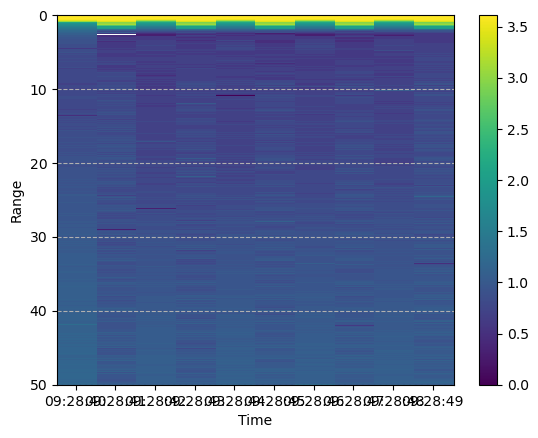

In [2]:
echo.echogram()